# HR Analytics

### In any company, hiring and retaining employees are complex tasks that require capital, time, and skills. Through this EDA we will predict whether the potential candidate will join the organization or not. The findings will support more effective and efficient employee retainment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:/Users/preeti nayak/Desktop/DATA ANALYST/PROJECT - EXCELR/HR_Analytics_Data.csv')

In [4]:
data.head()

,Id,Age,Gender,Marital_status,Numofcomp_worked,Work_Exp,Last_sal,Sal_hike,Work_hrs,Traveling_reqd,...,Annual_leave,Medical_Family,Child_daycare,Nursing_room,Parking,Comp_size,Comp_rating,Work_life_Bal,Stress_lvl,Accept_offer
0,1,19-26,Male,Single,3-5',5,7-10K,More than 100%,Mon-Fri,No,...,More 12 Days,No,No,NaN,No,More than 5000,Moderate rating,Often,Moderately stressed,No
1,2,27-33,Female,Married,0-2',5,3.5-7K,50-75%,Mon-Fri,No,...,More 12 Days,No,No,Yes,No,More than 5000,Moderate rating,Always,Moderately stressed,Yes
2,3,27-33,Male,Married,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,NaN,Yes,More than 5000,Average rating,Rarely,Extremely stressed,No
3,4,19-26,Male,Single,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,NaN,Yes,2000-5000,Average rating,Often,Very stressed,Yes
4,5,34-40,Male,Single,6-8',8,3.5-7K,75-100%,Mon-Fri,No,...,More 12 Days,No,No,NaN,Yes,More than 5000,High rating,Often,Somewhat stressed,Yes


In [5]:
data.tail()

,Id,Age,Gender,Marital_status,Numofcomp_worked,Work_Exp,Last_sal,Sal_hike,Work_hrs,Traveling_reqd,...,Annual_leave,Medical_Family,Child_daycare,Nursing_room,Parking,Comp_size,Comp_rating,Work_life_Bal,Stress_lvl,Accept_offer
5033,5034,27-33,Female,Married,3-5',8,7-10K,50-75%,24/7 operation,Yes,...,More 12 Days,No,No,Yes,Yes,More than 5000,Moderate rating,Always,Moderately stressed,No
5034,5035,27-33,Female,Married,0-2',5,1-3.5K,25-50%,Mon-Fri,No,...,More 12 Days,No,No,No,Yes,500-2000,Moderate rating,Sometimes,Very stressed,Yes
5035,5036,27-33,Female,Single,9 Above,8,10-15K,75-100%,Flexible Hours,Yes,...,More 12 Days,Yes,No,No,No,2000-5000,Average rating,Rarely,Extremely stressed,No
5036,5037,27-33,Male,Single,9 Above,5,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,NaN,No,More than 5000,Average rating,Often,Extremely stressed,No
5037,5038,19-26,Female,Married,0-2',8,3.5-7K,50-75%,Mon-Fri,No,...,More 12 Days,No,Yes,No,No,Less than 200,Moderate rating,Often,Somewhat stressed,Yes


In [6]:
data.shape

(5038, 34)

In [7]:
data.isnull().sum()

Id                             0
Age                            0
Gender                         0
Marital_status                 0
Numofcomp_worked               0
Work_Exp                       0
Last_sal                       0
Sal_hike                       0
Work_hrs                       0
Traveling_reqd                 0
NoticePeriod_buyout            0
Job_type                       0
comp_Possess_vehicle           0
Work_location                  0
Traveltowork_distance          0
Work_area_living_cost          0
Public_transport_nearby        0
Current_employment             0
Offerletr_Processtime.wk       0
Bonus                          0
Allowance                      0
Overtime_pay                   0
Emp_shares_scheme              0
Performance_incentive          0
Annual_leave                   0
Medical_Family                 0
Child_daycare                  0
Nursing_room                2457
Parking                        0
Comp_size                      0
Comp_ratin

In [8]:
data[data.Nursing_room.isnull()]

,Id,Age,Gender,Marital_status,Numofcomp_worked,Work_Exp,Last_sal,Sal_hike,Work_hrs,Traveling_reqd,...,Annual_leave,Medical_Family,Child_daycare,Nursing_room,Parking,Comp_size,Comp_rating,Work_life_Bal,Stress_lvl,Accept_offer
0,1,19-26,Male,Single,3-5',5,7-10K,More than 100%,Mon-Fri,No,...,More 12 Days,No,No,NaN,No,More than 5000,Moderate rating,Often,Moderately stressed,No
2,3,27-33,Male,Married,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,NaN,Yes,More than 5000,Average rating,Rarely,Extremely stressed,No
3,4,19-26,Male,Single,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,NaN,Yes,2000-5000,Average rating,Often,Very stressed,Yes
4,5,34-40,Male,Single,6-8',8,3.5-7K,75-100%,Mon-Fri,No,...,More 12 Days,No,No,NaN,Yes,More than 5000,High rating,Often,Somewhat stressed,Yes
5,6,27-33,Male,Married,3-5',5,7-10K,25-50%,Mon-Fri,No,...,More 12 Days,No,No,NaN,Yes,More than 5000,High rating,Often,Somewhat stressed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,5024,19-26,Male,Single,0-2',8,1-3.5K,25-50%,24/7 operation,No,...,More 12 Days,No,No,NaN,Yes,Less than 200,Average rating,Sometimes,Moderately stressed,Yes
5025,5026,34-40,Male,Married,3-5',8 Above,7-10K,25-50%,Mon-Fri,Yes,...,Less 12 Days,No,No,NaN,No,500-2000,Moderate rating,Sometimes,Extremely stressed,No
5026,5027,34-40,Male,Married,3-5',8 Above,7-10K,25-50%,Mon-Fri,Yes,...,Less 12 Days,No,No,NaN,No,500-2000,Moderate rating,Sometimes,Extremely stressed,No
5030,5031,34-40,Male,Married,9 Above,8 Above,10-15K,75-100%,Flexible Hours,No,...,More 12 Days,Yes,No,NaN,Yes,2000-5000,Low rating,Rarely,Extremely stressed,Yes


In [9]:
data['Nursing_room']. fillna(value=0,inplace=True)
data

,Id,Age,Gender,Marital_status,Numofcomp_worked,Work_Exp,Last_sal,Sal_hike,Work_hrs,Traveling_reqd,...,Annual_leave,Medical_Family,Child_daycare,Nursing_room,Parking,Comp_size,Comp_rating,Work_life_Bal,Stress_lvl,Accept_offer
0,1,19-26,Male,Single,3-5',5,7-10K,More than 100%,Mon-Fri,No,...,More 12 Days,No,No,0,No,More than 5000,Moderate rating,Often,Moderately stressed,No
1,2,27-33,Female,Married,0-2',5,3.5-7K,50-75%,Mon-Fri,No,...,More 12 Days,No,No,Yes,No,More than 5000,Moderate rating,Always,Moderately stressed,Yes
2,3,27-33,Male,Married,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,0,Yes,More than 5000,Average rating,Rarely,Extremely stressed,No
3,4,19-26,Male,Single,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,0,Yes,2000-5000,Average rating,Often,Very stressed,Yes
4,5,34-40,Male,Single,6-8',8,3.5-7K,75-100%,Mon-Fri,No,...,More 12 Days,No,No,0,Yes,More than 5000,High rating,Often,Somewhat stressed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5034,27-33,Female,Married,3-5',8,7-10K,50-75%,24/7 operation,Yes,...,More 12 Days,No,No,Yes,Yes,More than 5000,Moderate rating,Always,Moderately stressed,No
5034,5035,27-33,Female,Married,0-2',5,1-3.5K,25-50%,Mon-Fri,No,...,More 12 Days,No,No,No,Yes,500-2000,Moderate rating,Sometimes,Very stressed,Yes
5035,5036,27-33,Female,Single,9 Above,8,10-15K,75-100%,Flexible Hours,Yes,...,More 12 Days,Yes,No,No,No,2000-5000,Average rating,Rarely,Extremely stressed,No
5036,5037,27-33,Male,Single,9 Above,5,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,0,No,More than 5000,Average rating,Often,Extremely stressed,No


In [10]:
data.isnull().any()

Id                          False
Age                         False
Gender                      False
Marital_status              False
Numofcomp_worked            False
Work_Exp                    False
Last_sal                    False
Sal_hike                    False
Work_hrs                    False
Traveling_reqd              False
NoticePeriod_buyout         False
Job_type                    False
comp_Possess_vehicle        False
Work_location               False
Traveltowork_distance       False
Work_area_living_cost       False
Public_transport_nearby     False
Current_employment          False
Offerletr_Processtime.wk    False
Bonus                       False
Allowance                   False
Overtime_pay                False
Emp_shares_scheme           False
Performance_incentive       False
Annual_leave                False
Medical_Family              False
Child_daycare               False
Nursing_room                False
Parking                     False
Comp_size     

In [11]:
data.dtypes

Id                           int64
Age                         object
Gender                      object
Marital_status              object
Numofcomp_worked            object
Work_Exp                    object
Last_sal                    object
Sal_hike                    object
Work_hrs                    object
Traveling_reqd              object
NoticePeriod_buyout         object
Job_type                    object
comp_Possess_vehicle        object
Work_location               object
Traveltowork_distance       object
Work_area_living_cost       object
Public_transport_nearby     object
Current_employment          object
Offerletr_Processtime.wk    object
Bonus                       object
Allowance                   object
Overtime_pay                object
Emp_shares_scheme           object
Performance_incentive       object
Annual_leave                object
Medical_Family              object
Child_daycare               object
Nursing_room                object
Parking             

In [13]:
data.describe()

,Id
count,5038.000000
mean,2519.500000
std,1454.489658
min,1.000000
25%,1260.250000
50%,2519.500000
75%,3778.750000
max,5038.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        5038 non-null   int64 
 1   Age                       5038 non-null   object
 2   Gender                    5038 non-null   object
 3   Marital_status            5038 non-null   object
 4   Numofcomp_worked          5038 non-null   object
 5   Work_Exp                  5038 non-null   object
 6   Last_sal                  5038 non-null   object
 7   Sal_hike                  5038 non-null   object
 8   Work_hrs                  5038 non-null   object
 9   Traveling_reqd            5038 non-null   object
 10  NoticePeriod_buyout       5038 non-null   object
 11  Job_type                  5038 non-null   object
 12  comp_Possess_vehicle      5038 non-null   object
 13  Work_location             5038 non-null   object
 14  Traveltowork_distance   

In [18]:
# .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1=data.copy()
type

type

In [19]:
# Finding Duplicates
data[data.duplicated()].shape

(0, 34)

In [20]:
data

,Id,Age,Gender,Marital_status,Numofcomp_worked,Work_Exp,Last_sal,Sal_hike,Work_hrs,Traveling_reqd,...,Annual_leave,Medical_Family,Child_daycare,Nursing_room,Parking,Comp_size,Comp_rating,Work_life_Bal,Stress_lvl,Accept_offer
0,1,19-26,Male,Single,3-5',5,7-10K,More than 100%,Mon-Fri,No,...,More 12 Days,No,No,0,No,More than 5000,Moderate rating,Often,Moderately stressed,No
1,2,27-33,Female,Married,0-2',5,3.5-7K,50-75%,Mon-Fri,No,...,More 12 Days,No,No,Yes,No,More than 5000,Moderate rating,Always,Moderately stressed,Yes
2,3,27-33,Male,Married,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,0,Yes,More than 5000,Average rating,Rarely,Extremely stressed,No
3,4,19-26,Male,Single,0-2',8,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,0,Yes,2000-5000,Average rating,Often,Very stressed,Yes
4,5,34-40,Male,Single,6-8',8,3.5-7K,75-100%,Mon-Fri,No,...,More 12 Days,No,No,0,Yes,More than 5000,High rating,Often,Somewhat stressed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5034,27-33,Female,Married,3-5',8,7-10K,50-75%,24/7 operation,Yes,...,More 12 Days,No,No,Yes,Yes,More than 5000,Moderate rating,Always,Moderately stressed,No
5034,5035,27-33,Female,Married,0-2',5,1-3.5K,25-50%,Mon-Fri,No,...,More 12 Days,No,No,No,Yes,500-2000,Moderate rating,Sometimes,Very stressed,Yes
5035,5036,27-33,Female,Single,9 Above,8,10-15K,75-100%,Flexible Hours,Yes,...,More 12 Days,Yes,No,No,No,2000-5000,Average rating,Rarely,Extremely stressed,No
5036,5037,27-33,Male,Single,9 Above,5,3.5-7K,25-50%,Mon-Fri,Yes,...,More 12 Days,No,No,0,No,More than 5000,Average rating,Often,Extremely stressed,No


In [21]:
data[data.duplicated()]

,Id,Age,Gender,Marital_status,Numofcomp_worked,Work_Exp,Last_sal,Sal_hike,Work_hrs,Traveling_reqd,...,Annual_leave,Medical_Family,Child_daycare,Nursing_room,Parking,Comp_size,Comp_rating,Work_life_Bal,Stress_lvl,Accept_offer


In [22]:
data_cleaned1=data.drop_duplicates()

In [23]:
data_cleaned1.shape

(5038, 34)

# Outliers Detection

<AxesSubplot:>

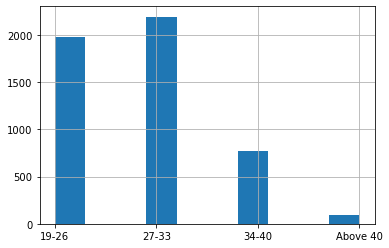

In [24]:
data['Age'].hist()

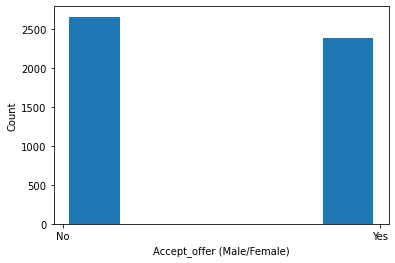

In [25]:
plt.hist(data.Accept_offer,bins=5, rwidth=0.8)
plt.xlabel('Accept_offer (Male/Female)')
plt.ylabel('Count')
plt.show()

In [26]:
data.Accept_offer.describe()

count     5038
unique       2
top         No
freq      2654
Name: Accept_offer, dtype: object

In [27]:
data.Age.describe()

count      5038
unique        4
top       27-33
freq       2190
Name: Age, dtype: object

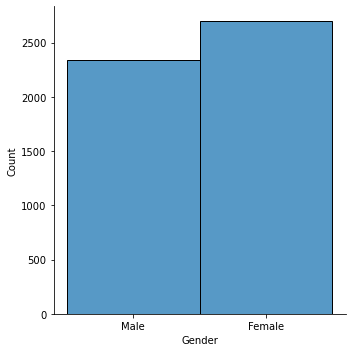

In [28]:
sns.displot(data['Gender'])

C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sal_hike', ylabel='Accept_offer'>

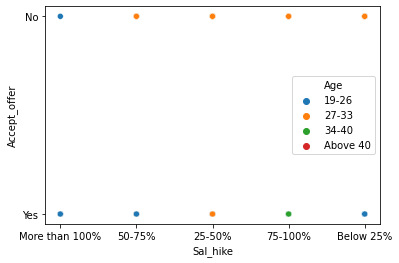

In [29]:
sns.scatterplot(data['Sal_hike'],data['Accept_offer'], hue= data['Age'])

C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Job_type', ylabel='Accept_offer'>

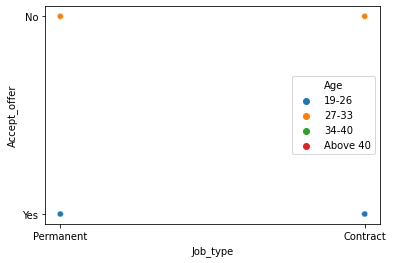

In [6]:
sns.scatterplot(data['Job_type'],data['Accept_offer'], hue= data['Age'])

<AxesSubplot:xlabel='Stress_lvl', ylabel='count'>

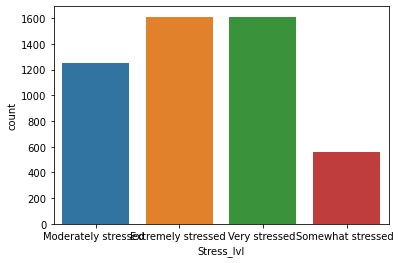

In [32]:
sns.countplot(x='Stress_lvl',
 data=data)

In [33]:
data.Stress_lvl.describe()

count               5038
unique                 4
top       Very stressed 
freq                1611
Name: Stress_lvl, dtype: object

<AxesSubplot:xlabel='Offerletr_Processtime.wk', ylabel='count'>

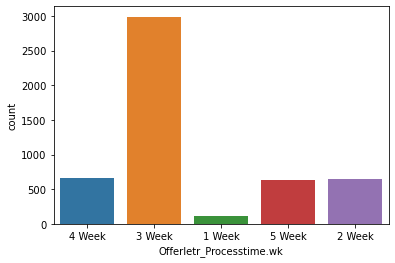

In [34]:
sns.countplot(x='Offerletr_Processtime.wk',
 data=data)

<AxesSubplot:xlabel='Current_employment', ylabel='count'>

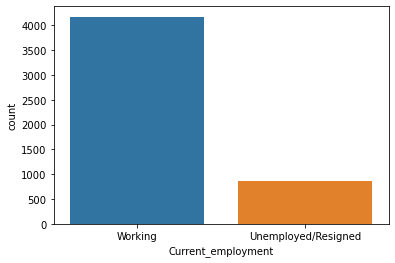

In [35]:
sns.countplot(x='Current_employment',
 data=data)

<AxesSubplot:xlabel='Traveltowork_distance', ylabel='count'>

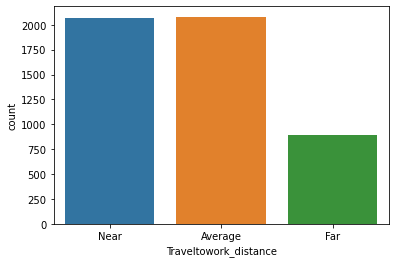

In [36]:
sns.countplot(x='Traveltowork_distance',
 data=data)

In [37]:
data.Traveltowork_distance.describe()

count        5038
unique          3
top       Average
freq         2080
Name: Traveltowork_distance, dtype: object

<AxesSubplot:xlabel='NoticePeriod_buyout', ylabel='count'>

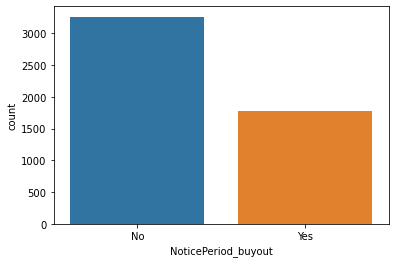

In [31]:
sns.countplot(x="NoticePeriod_buyout",
 data=data)

<AxesSubplot:xlabel='Job_type', ylabel='count'>

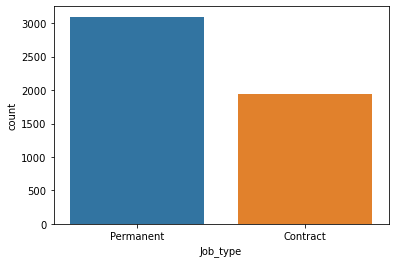

In [39]:
sns.countplot(x='Job_type',
 data=data)

<AxesSubplot:xlabel='Job_type', ylabel='count'>

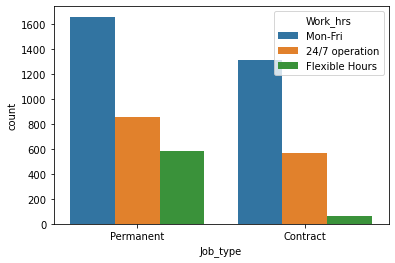

In [17]:
sns.countplot(x = 'Job_type', hue = 'Work_hrs', data = data)

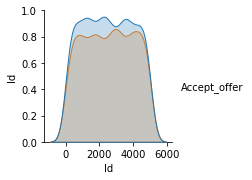

In [40]:
sns.pairplot(data,hue='Accept_offer')

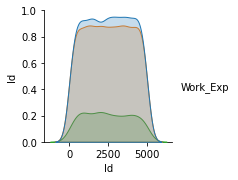

In [41]:
sns.pairplot(data,hue='Work_Exp')

In [42]:
data.Work_Exp.describe()

count     5038
unique       3
top          5
freq      2315
Name: Work_Exp, dtype: object

# Correlation

In [7]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13055 sha256=96620a1cb498a9f4385ae49b5d10d2dda9383d3715982261dcb15d88922ef72c
  Stored in directory: c:\users\preeti nayak\appdata\local\pip\cache\wheels\fb\0e\65\da65ce669381fc01b6ef990d301d3586991f89bff1175877a4
Successfully built ppscore


In [3]:
import ppscore as pps

In [5]:
pps.score(data,'Job_type', 'Accept_offer')

{'x': 'Job_type',
 'y': 'Accept_offer',
 'ppscore': 0.36819114080410975,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.4984,
 'model_score': 0.6830846762273415,
 'model': DecisionTreeClassifier()}

In [7]:
mat = pps.matrix(data)

In [6]:
mat

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Id,Id,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,Id,Age,0.000000e+00,classification,True,weighted F1,0.371600,0.371404,DecisionTreeClassifier()
2,Id,Gender,0.000000e+00,classification,True,weighted F1,0.513600,0.495971,DecisionTreeClassifier()
3,Id,Marital_status,1.312628e-02,classification,True,weighted F1,0.503600,0.510116,DecisionTreeClassifier()
4,Id,Numofcomp_worked,0.000000e+00,classification,True,weighted F1,0.495246,0.474866,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
1151,Accept_offer,Comp_size,3.384366e-02,classification,True,weighted F1,0.291600,0.315575,DecisionTreeClassifier()
1152,Accept_offer,Comp_rating,0.000000e+00,classification,True,weighted F1,0.263800,0.227202,DecisionTreeClassifier()
1153,Accept_offer,Work_life_Bal,1.073156e-07,classification,True,weighted F1,0.315054,0.315054,DecisionTreeClassifier()
1154,Accept_offer,Stress_lvl,4.678632e-02,classification,True,weighted F1,0.290600,0.323790,DecisionTreeClassifier()


<AxesSubplot:>

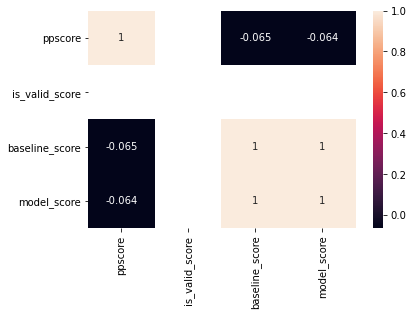

In [9]:
sns.heatmap(mat.corr(),annot=True)

<AxesSubplot:xlabel='x', ylabel='y'>

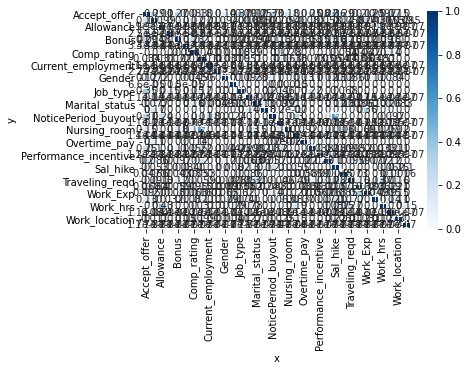

In [12]:
matrix_data=pps.matrix(data)[['x','y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_data, vmin=0, vmax=1, cmap='Blues', linewidths=0.5, annot=True)

# Distribution Analysis

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Work_Exp'}>],
       [<AxesSubplot:title={'center':'Sal_hike'}>,
        <AxesSubplot:title={'center':'Accept_offer'}>]], dtype=object)

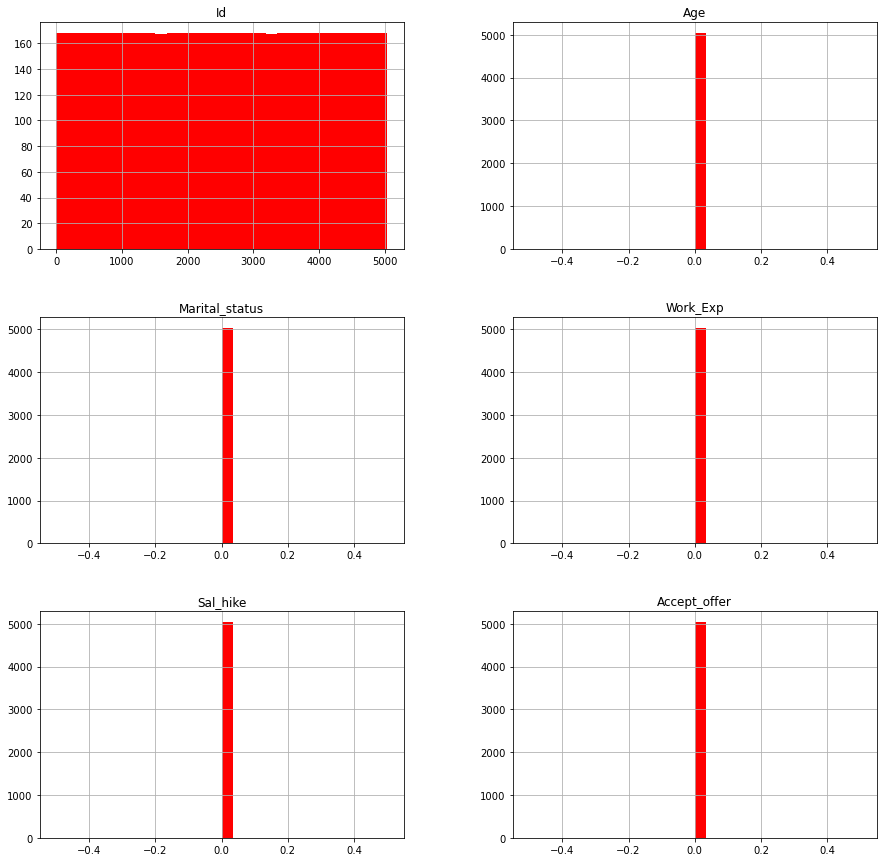

In [69]:
data['Accept_offer'] = data['Accept_offer'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Age'] = data['Age'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Marital_status'] = data['Marital_status'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Sal_hike'] = data['Sal_hike'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Work_Exp'] = data['Work_Exp'].apply(lambda x: 1 if x == 'Yes' else 0)
data.hist(bins = 30, figsize= (15, 15), color = 'r')

<AxesSubplot:xlabel='Age', ylabel='count'>

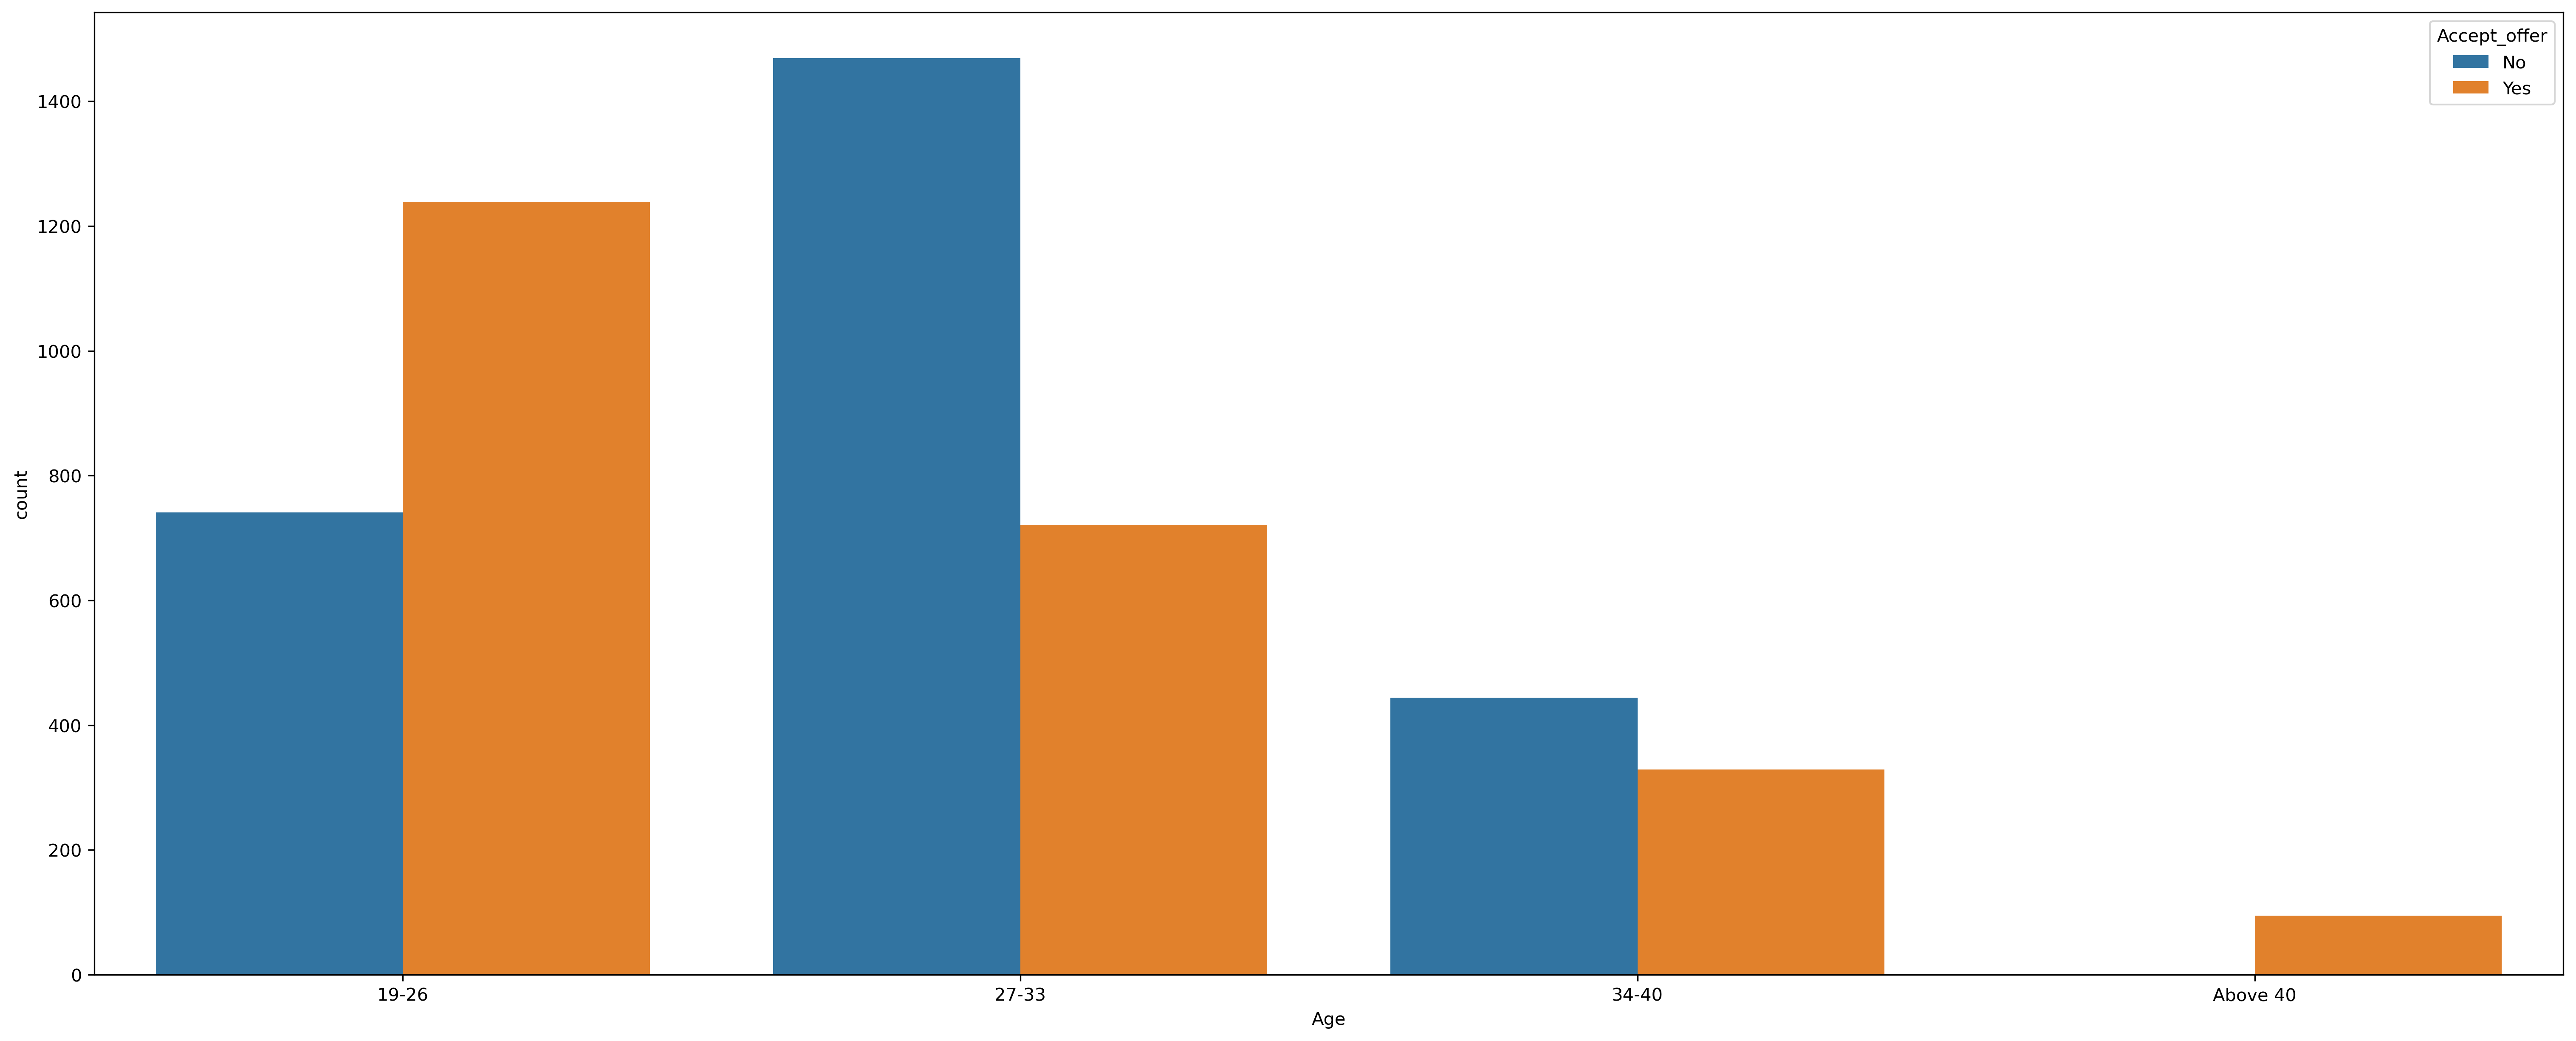

In [7]:
plt.figure(figsize = (25, 10), dpi = 300)
sns.countplot(x = 'Age', hue = 'Accept_offer', data = data)

<AxesSubplot:xlabel='Age', ylabel='count'>

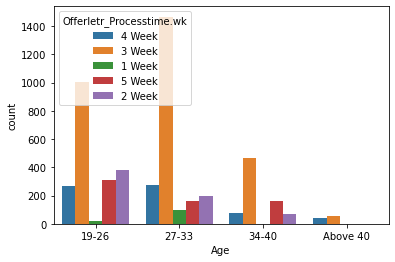

In [19]:
sns.countplot(x = 'Age', hue = 'Offerletr_Processtime.wk', data = data)

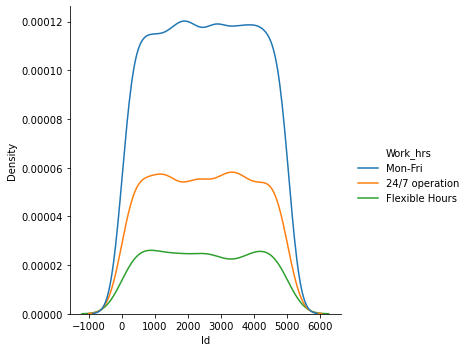

In [23]:
sns.displot(data=data, x="Id", hue="Work_hrs", kind="kde")

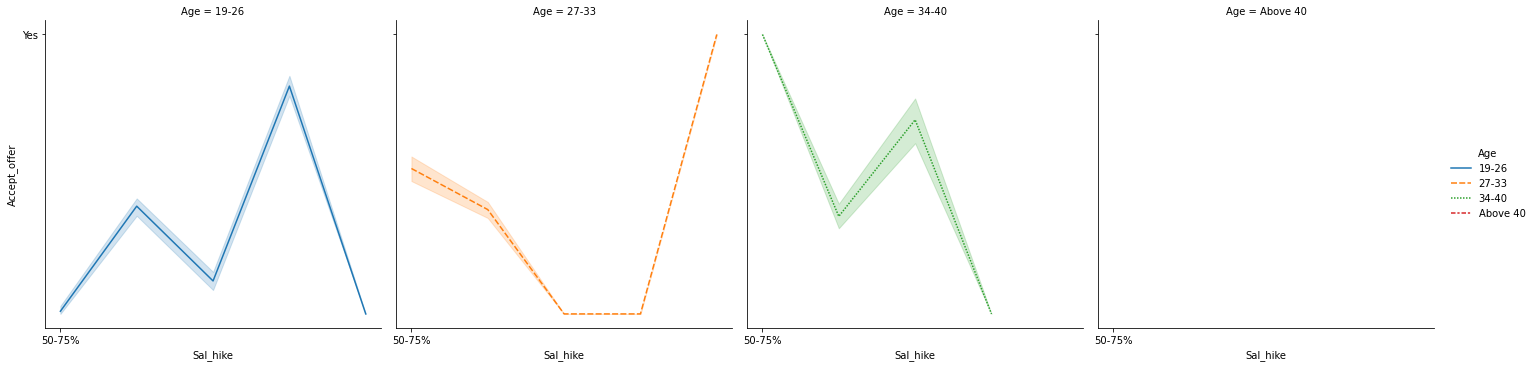

In [33]:
fmri = sns.load_dataset('fmri')
sns.relplot(
    data=data, kind='line',
    x="Sal_hike", y="Accept_offer", col="Age",
    hue="Age", style="Age",
)

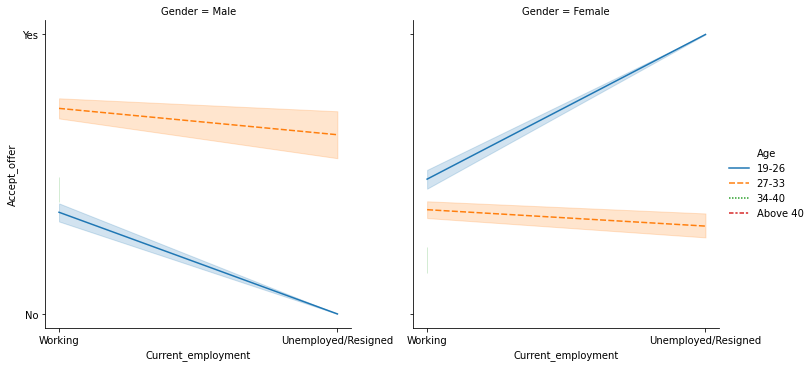

In [43]:
fmri = sns.load_dataset('fmri')
sns.relplot(
    data=data, kind='line',
    x="Current_employment", y="Accept_offer", col="Gender",
    hue="Age", style="Age",
)

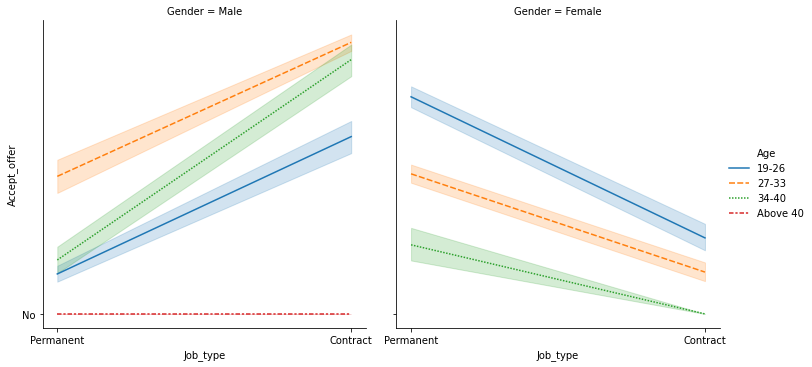

In [34]:
fmri = sns.load_dataset('fmri')
sns.relplot(
    data=data, kind='line',
    x="Job_type", y="Accept_offer", col="Gender",
    hue="Age", style="Age",
)

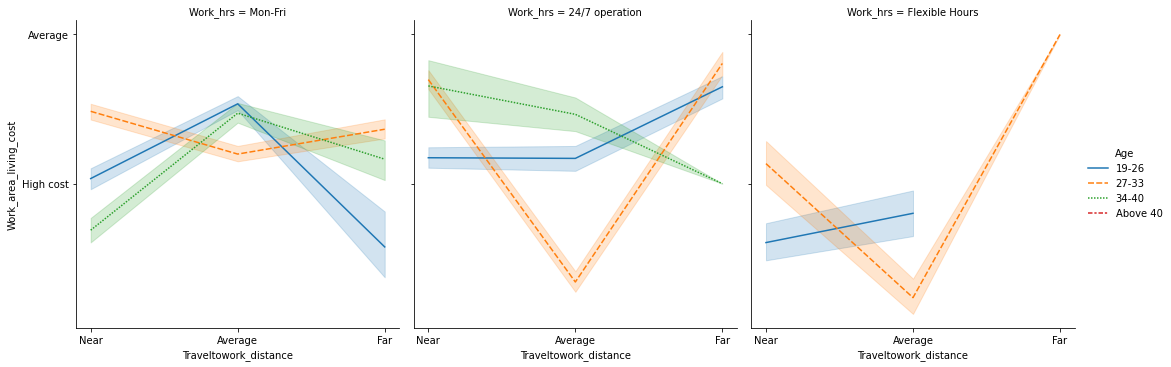

In [41]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=data, kind="line",
    x="Traveltowork_distance", y = "Work_area_living_cost", col= "Work_hrs",
    hue="Age", style="Age")

C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sal_hike', ylabel='count'>

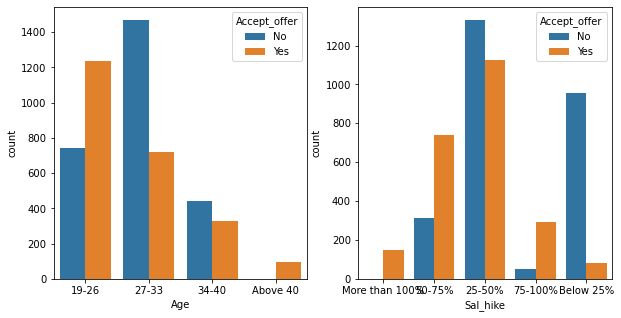

In [4]:
#plt.subplot(#Total number of rows,total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot('Age', hue='Accept_offer', data=data)

plt.subplot(1,2,2)
sns.countplot('Sal_hike', hue='Accept_offer', data=data)

In [5]:
data.columns

Index(['Id', 'Age', 'Gender', 'Marital_status', 'Numofcomp_worked', 'Work_Exp',
       'Last_sal', 'Sal_hike', 'Work_hrs', 'Traveling_reqd',
       'NoticePeriod_buyout', 'Job_type', 'comp_Possess_vehicle',
       'Work_location', 'Traveltowork_distance', 'Work_area_living_cost',
       'Public_transport_nearby', 'Current_employment',
       'Offerletr_Processtime.wk', 'Bonus', 'Allowance', 'Overtime_pay',
       'Emp_shares_scheme', 'Performance_incentive', 'Annual_leave',
       'Medical_Family', 'Child_daycare', 'Nursing_room', 'Parking',
       'Comp_size', 'Comp_rating', 'Work_life_Bal', 'Stress_lvl',
       'Accept_offer'],
      dtype='object')

In [6]:
data1=['Age', 'Gender', 'Marital_status', 'Numofcomp_worked', 'Work_Exp',
       'Last_sal', 'Sal_hike', 'Work_hrs', 'Traveling_reqd',
       'NoticePeriod_buyout', 'Job_type', 'comp_Possess_vehicle',
       'Work_location', 'Traveltowork_distance', 'Work_area_living_cost',
       'Public_transport_nearby', 'Current_employment',
       'Offerletr_Processtime.wk', 'Bonus', 'Allowance', 'Overtime_pay',
       'Emp_shares_scheme', 'Performance_incentive', 'Annual_leave',
       'Medical_Family', 'Child_daycare', 'Nursing_room', 'Parking',
       'Comp_size', 'Comp_rating', 'Work_life_Bal', 'Stress_lvl',
       'Accept_offer']

In [7]:
list(enumerate(data1))

[(0, 'Age'),
 (1, 'Gender'),
 (2, 'Marital_status'),
 (3, 'Numofcomp_worked'),
 (4, 'Work_Exp'),
 (5, 'Last_sal'),
 (6, 'Sal_hike'),
 (7, 'Work_hrs'),
 (8, 'Traveling_reqd'),
 (9, 'NoticePeriod_buyout'),
 (10, 'Job_type'),
 (11, 'comp_Possess_vehicle'),
 (12, 'Work_location'),
 (13, 'Traveltowork_distance'),
 (14, 'Work_area_living_cost'),
 (15, 'Public_transport_nearby'),
 (16, 'Current_employment'),
 (17, 'Offerletr_Processtime.wk'),
 (18, 'Bonus'),
 (19, 'Allowance'),
 (20, 'Overtime_pay'),
 (21, 'Emp_shares_scheme'),
 (22, 'Performance_incentive'),
 (23, 'Annual_leave'),
 (24, 'Medical_Family'),
 (25, 'Child_daycare'),
 (26, 'Nursing_room'),
 (27, 'Parking'),
 (28, 'Comp_size'),
 (29, 'Comp_rating'),
 (30, 'Work_life_Bal'),
 (31, 'Stress_lvl'),
 (32, 'Accept_offer')]

C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\p

C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\preeti nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\p

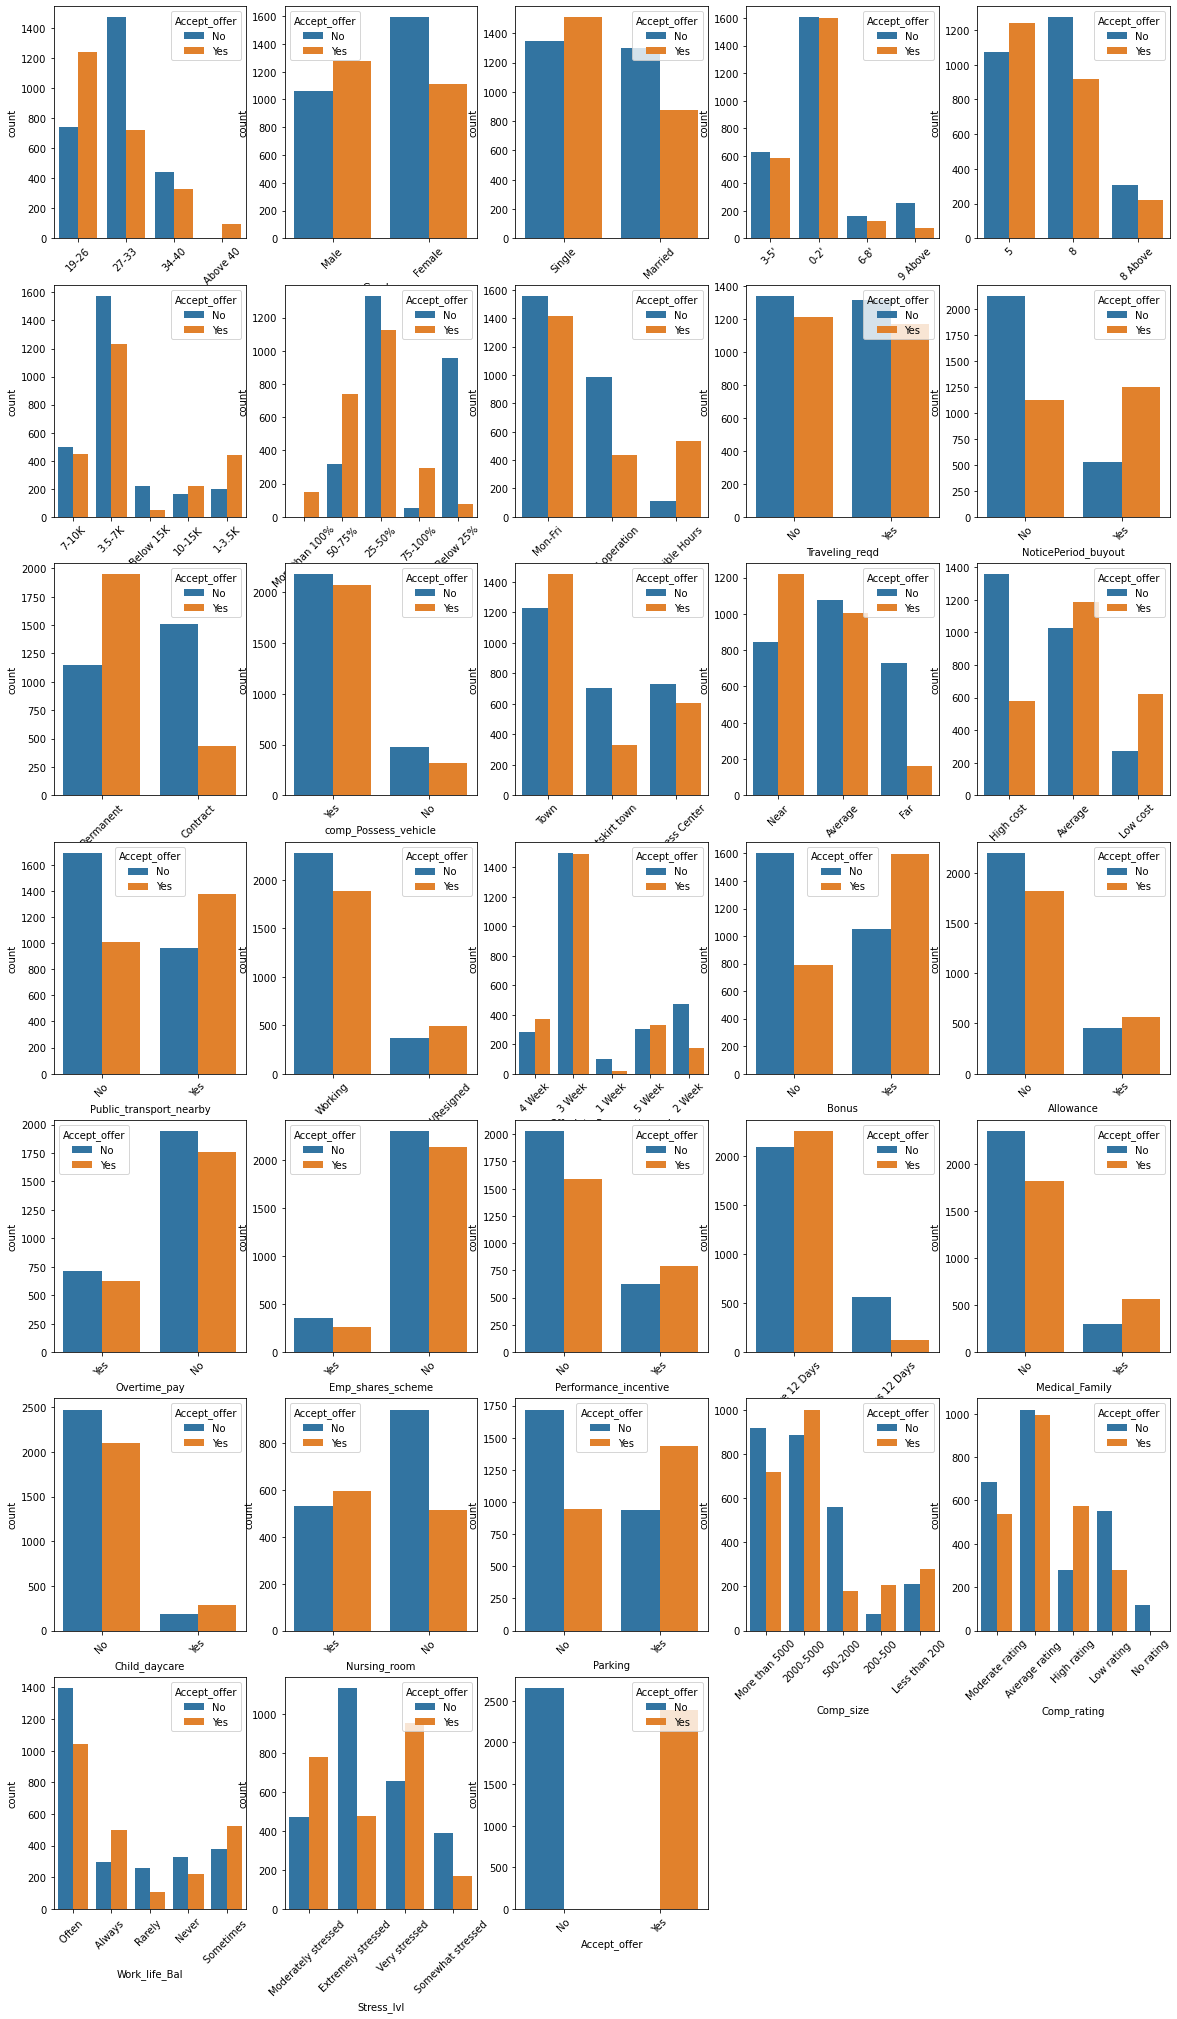

In [12]:
plt.figure(figsize=(20,35))
for i in enumerate(data1):
    plt.subplot(7,5,i[0]+1)
    sns.countplot(i[1],hue='Accept_offer', data=data)
    plt.xticks(rotation=45)

In [1]:
import pandas_profiling as pp

In [4]:
data=pd.read_csv(r'C:/Users/preeti nayak/Desktop/DATA ANALYST/PROJECT - EXCELR/HR_Analytics_Data.csv')

In [5]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html') 
EDA_report  

# The following Observations are made based on the above EDA

### - Candidates between age grp 19-26 will accept the offer whereas candidates between age grp 27-33 most likely will reject the offer.
### - As per the data, Female candidates will not accept the offer as compared to Male candidates.
### - The acceptance offer ratio of Single candidates is almost double than the Married candidates. However, the non acceptance of offer shows a slight higher bar for Single candidates than the Married candidates.
### - Candidates with 5 yrs of experience are most likely to accept the offer.
### - Candidates whose last salary is around 3.5-7K will most likely not accept the offer.
### - Candidates who have been offered a sal hike of around 25-50% will not agree to join the organisation
### - Candidates who prefer Mon-Fri working hours will accept the offer.
### - Candidates who have been offered Job type as Permanent will most likely join the organisation.
### - Candidates who will reject the offer are working proffessionals . As per EDA, it is showing an equal ratio of Yes and No when it comes to offer letter processing time taken by the organisation i.e. 3 weeks.
### - Most of the candidates will not accept the offer if the particular organisation will not provide employee benefits such as Performance incentive, Allowance, Overtime Pay, Emp share scheme, Medical Insurance facility etc.
### - Most candidates will choose either Yes or No for organisation with Average rating.
### - Candidates will not accept the offer if they find that their work life balance will be affected if they join the organisation.
### - Candidates may not join the organisation if they find the Work title that the organisation is offering is extremely stressful.
### - If you check the overall HR data, you will find that the Non acceptance offer ratio is more than Acceptance offer ratio. 